### 선 굵기 변경

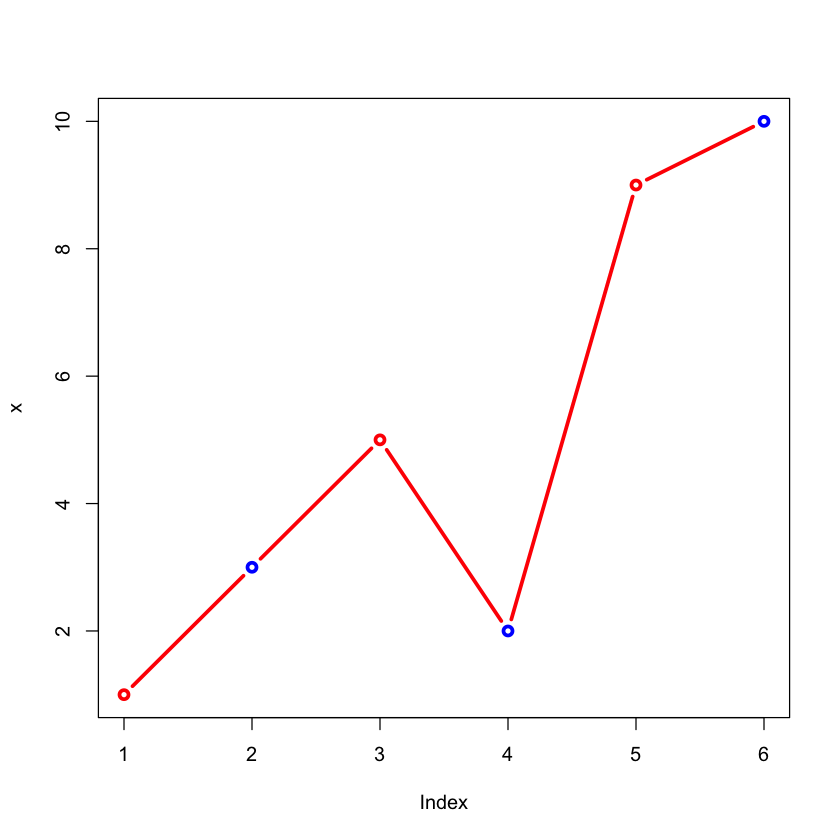

In [2]:
x <- c(1,3,5,2,9,10)
plot(x,
    type="b",
    col = c("red","blue"),
    lwd = 3,    # line width
    )

### 한 화면에 차트 여려게 그려서 비교하기

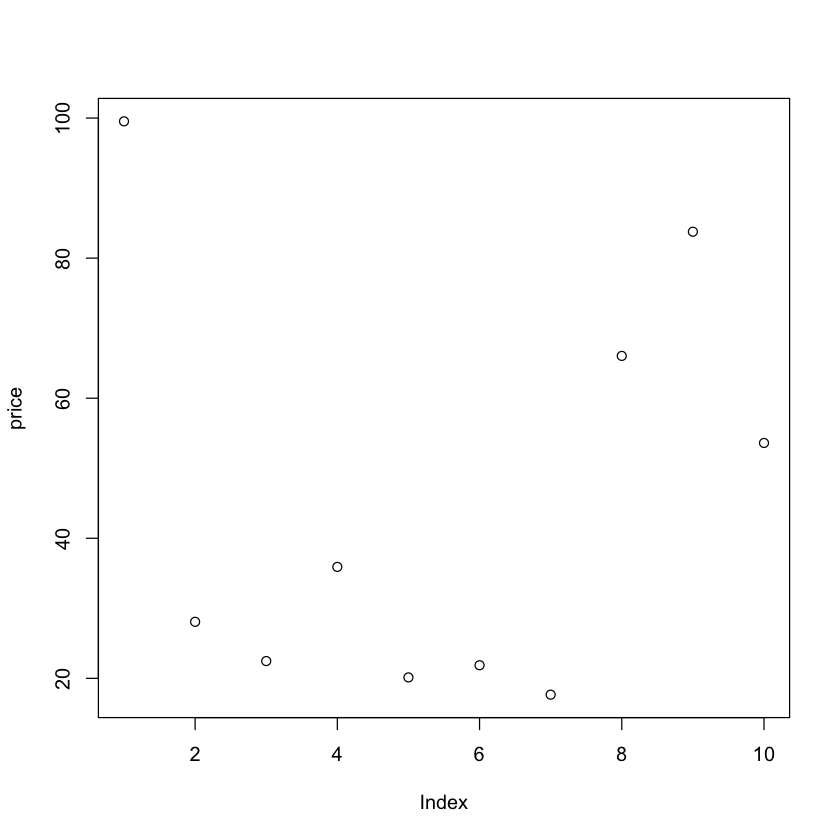

In [3]:
price <- runif(10, 1, 100)
plot(price)

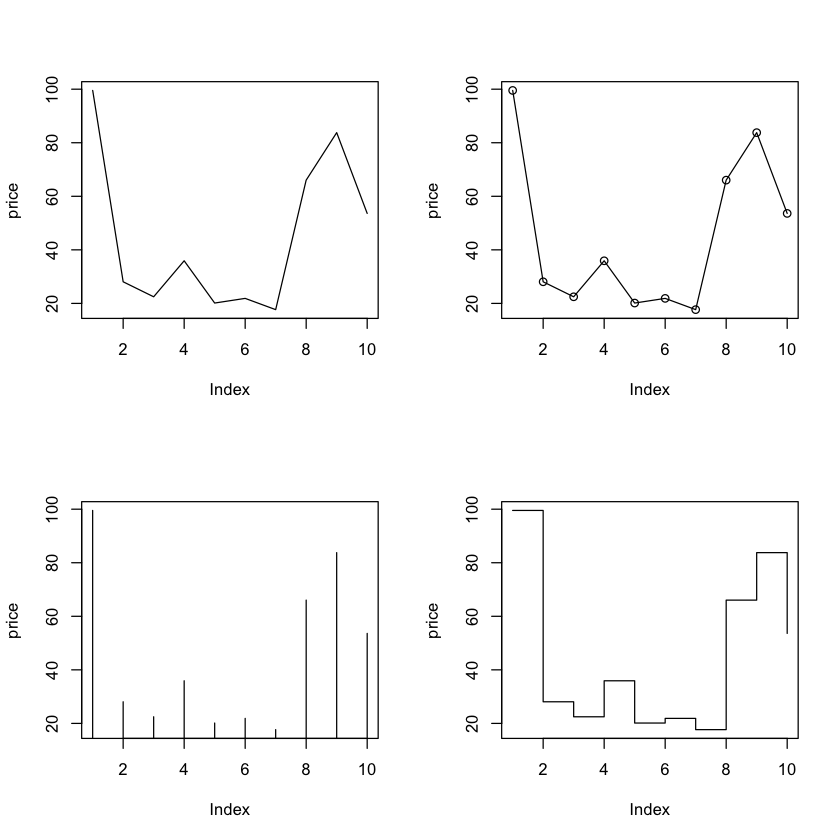

In [4]:
# 2행 2열 차트 그리기 : type 속성으로 구분해 보기

par(mfrow = c(2,2)) 
plot(price, type='l')
plot(price, type='o')
plot(price, type='h')
plot(price, type='s')

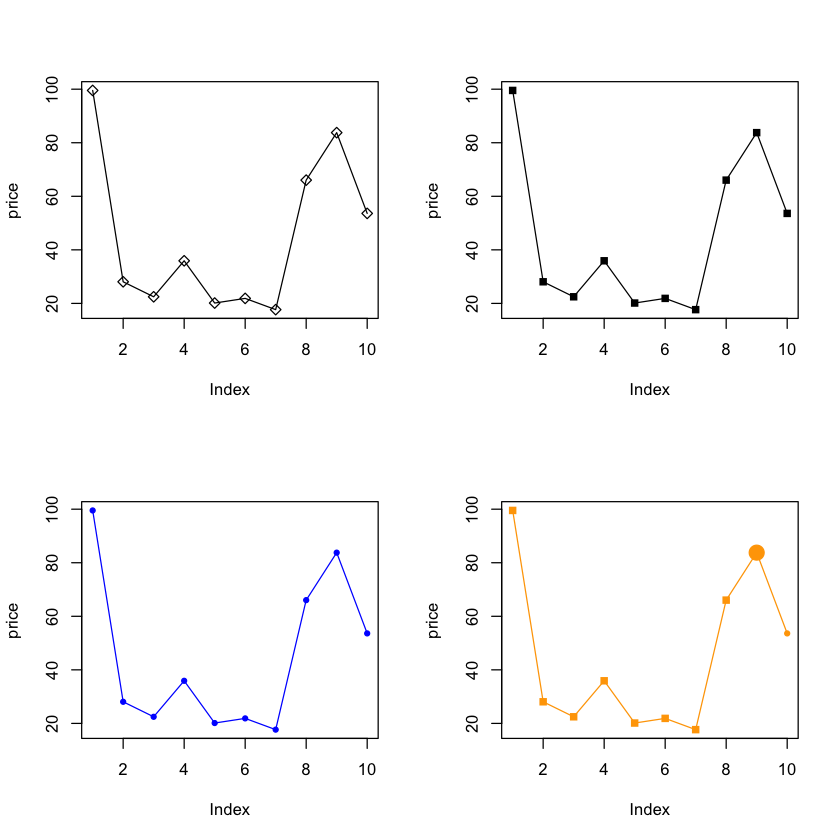

In [12]:
# 2행 2열 차트 그리기 : pch 속성으로 구분해 보기 (R은 모두 벡터)

par(mfrow = c(2,2))

plot(price, type="o", pch=5)
plot(price, type="o", pch=15)
plot(price, type="o", pch=20, col='blue')
plot(price, type="o", pch=c(rep(15,8), 20, 20), 
                      col='orange',
                      cex = c(rep(1,8),3,1), # R은 벡터이므로 특정부분만 크기, 색상 등 변경가능
                      )

### 중첩 자료 시각화

In [19]:
x <- c(1,2,3,4,2,4)
y <- rep(2, 6)

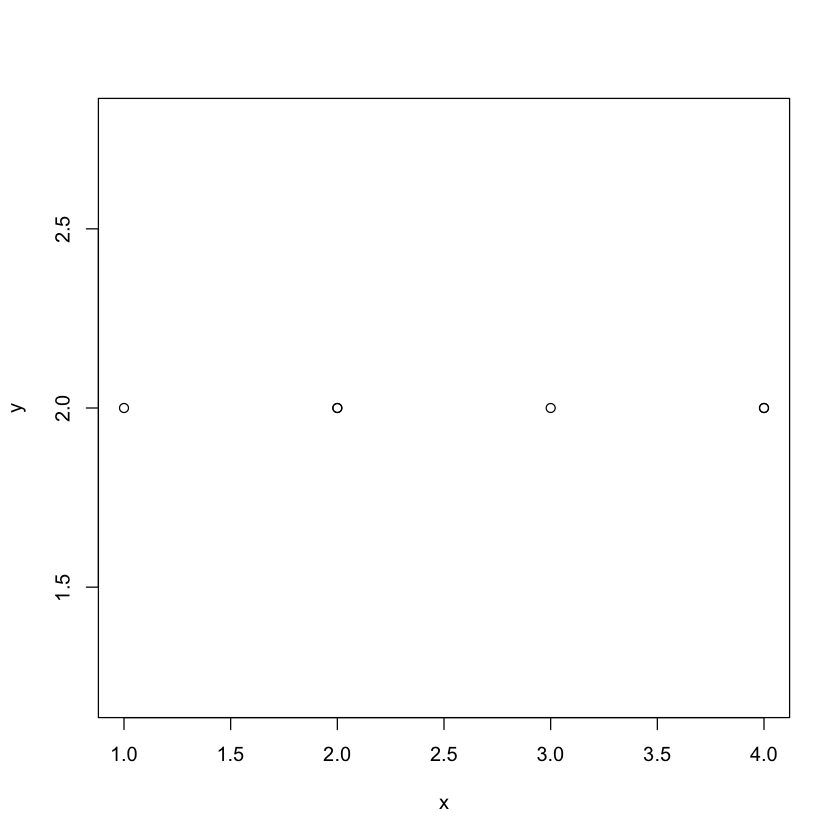

In [20]:
plot(x, y) # 데이터 중복

x,y,Freq
1,2,1
2,2,2
3,2,1
4,2,2


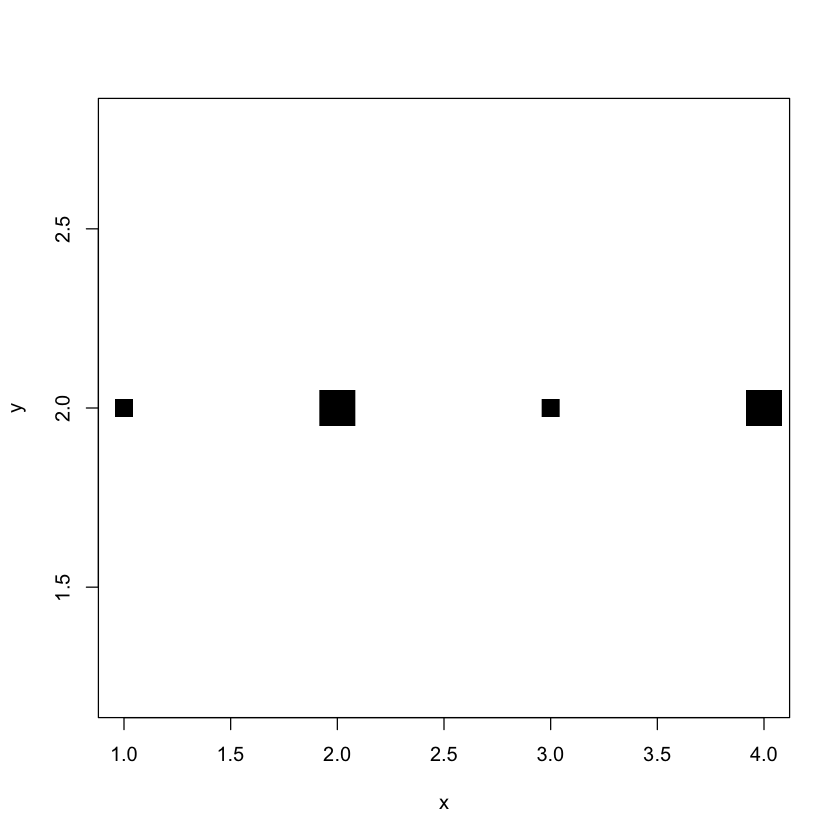

In [22]:
# Method 1
xy.df <- as.data.frame(table(x, y))
xy.df  # table을 데이터프레임으로 만들어 Freq 생성, Freq=x,y 조합의 빈도

plot(x,y,
    pch = 15,
    cex = 2 * xy.df$Freq   
    )

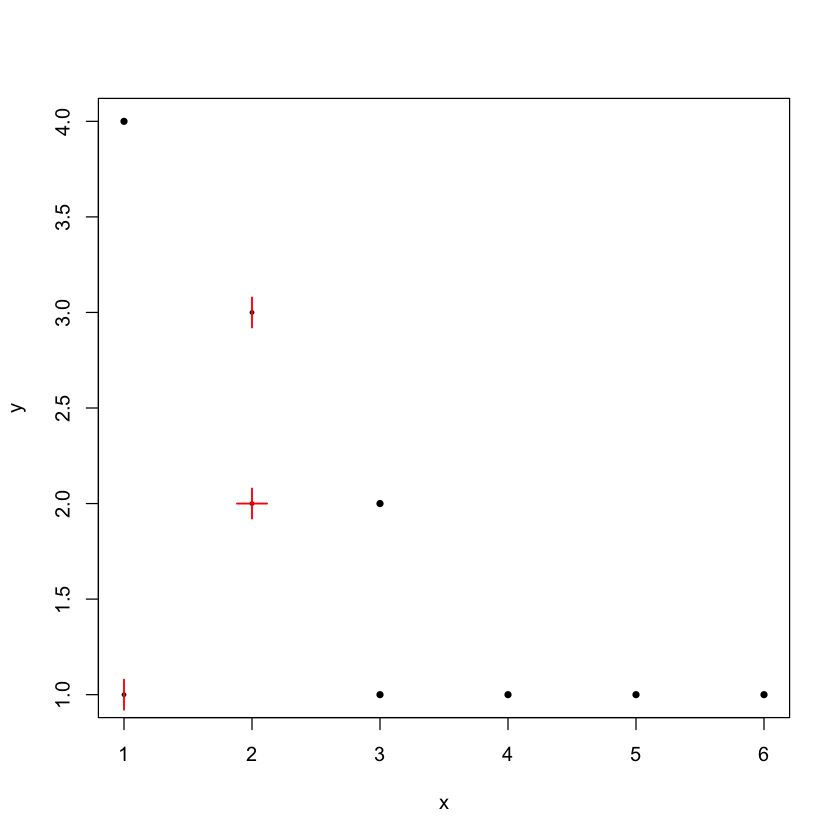

In [9]:
# Method 2
x <- c(1,1,1,2,2,2,2,2,2,3,3,4,5,6)
y <- c(1,1,4,2,3,2,2,2,3,2,1,1,1,1)

z <- data.frame(x,y)
sunflowerplot(z)

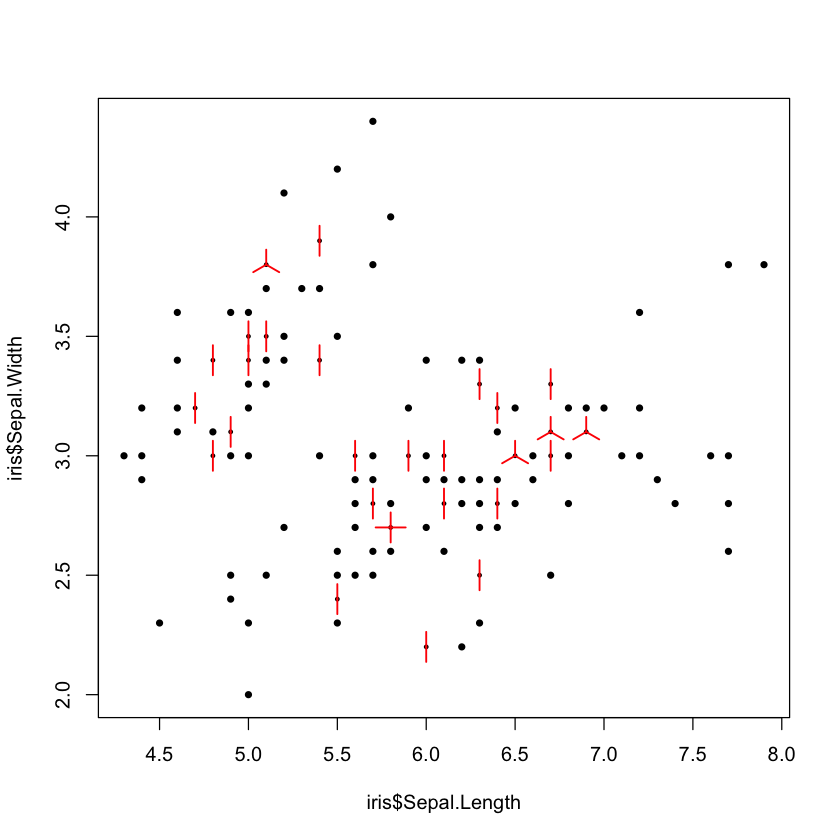

In [9]:
sunflowerplot(iris$Sepal.Length, iris$Sepal.Width)

### chart 2개를 겹처서 출력하기(투명도 조절)

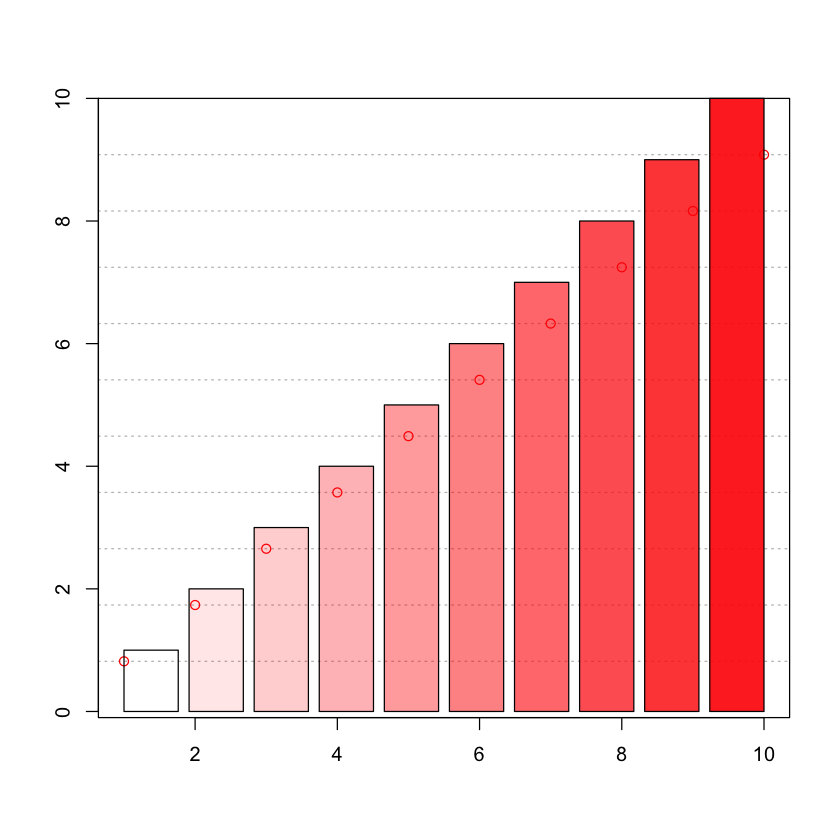

In [24]:
myCol <- rgb(1,0,0, seq(0,1,0.1)) # r,g,b,alpha(투명도)

x <- 1:10
dotchart(x, col='red')
par(new=T) # 현재 차트를 유지하고 그 위에 다른 차트를 생성한다
barplot(x, col=myCol)

### 상자 수염 그래프(이상치 확인)

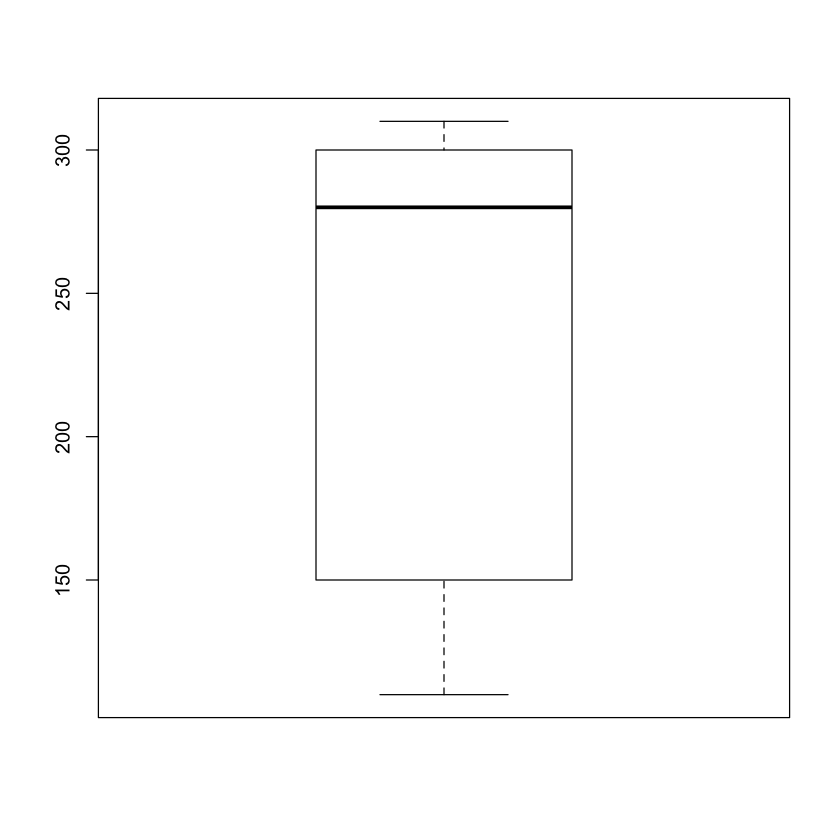

In [11]:
abc <- c(110, 300, 150, 280, 310)
boxplot(abc)

In [12]:
summary(abc)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    110     150     280     230     300     310 

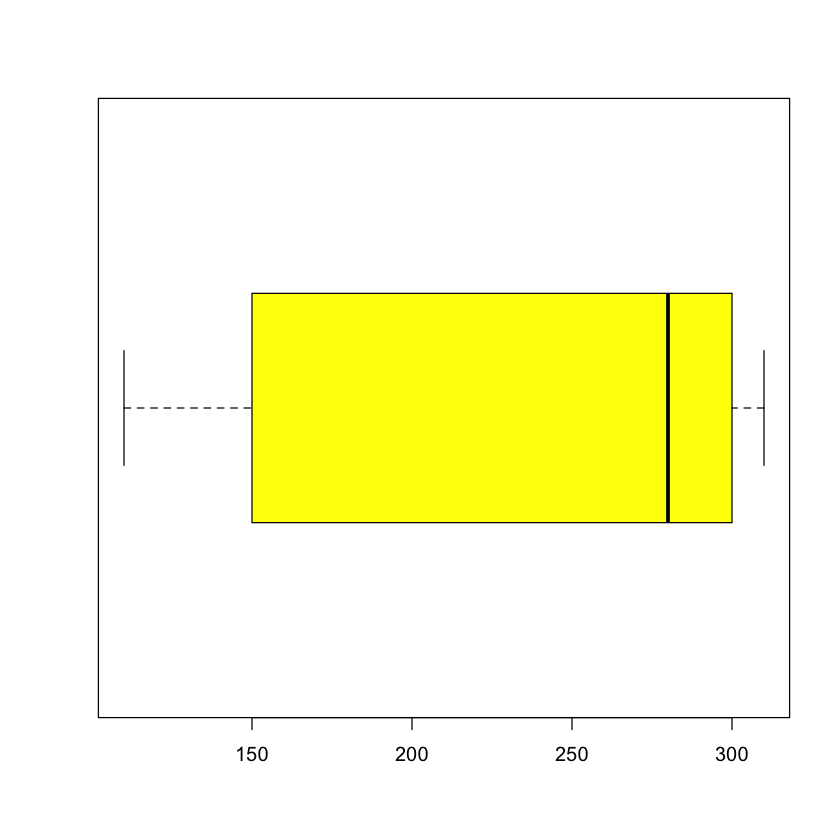

In [13]:
boxplot(abc,
       col='yellow',
       horizontal=T 
       )

In [14]:
def <- c(1,1,1,1,1,2,5)
summary(def)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.714   1.500   5.000 

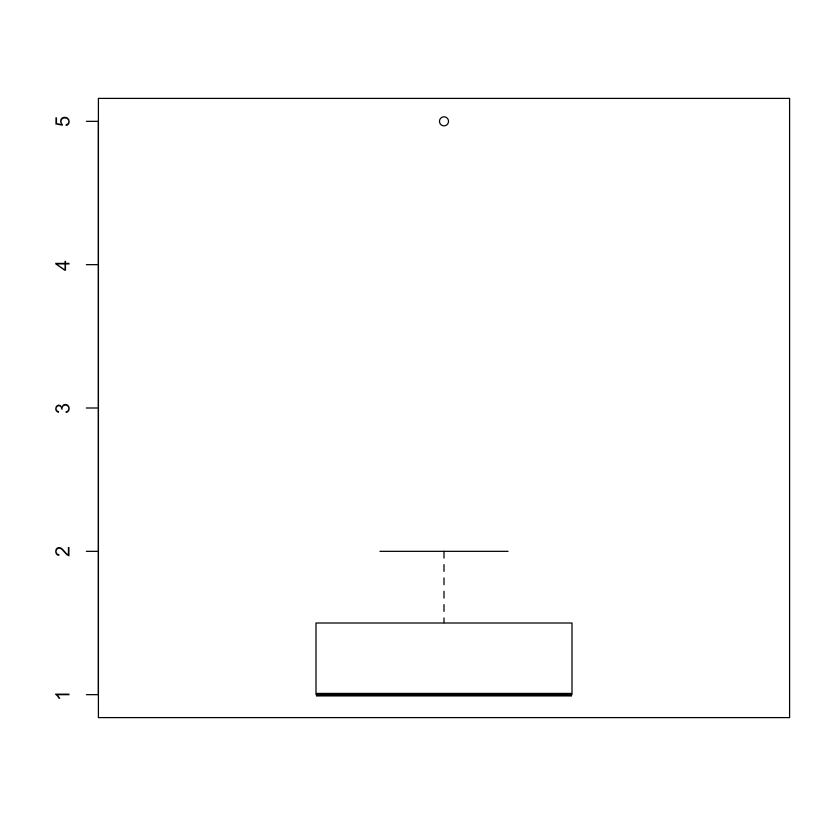

In [15]:
boxplot(def)

### 자동차의 제동거리

In [16]:
head(cars)

speed,dist
4,2
4,10
7,4
7,22
8,16
9,10


In [17]:
str(cars)

'data.frame':	50 obs. of  2 variables:
 $ speed: num  4 4 7 7 8 9 10 10 10 11 ...
 $ dist : num  2 10 4 22 16 10 18 26 34 17 ...


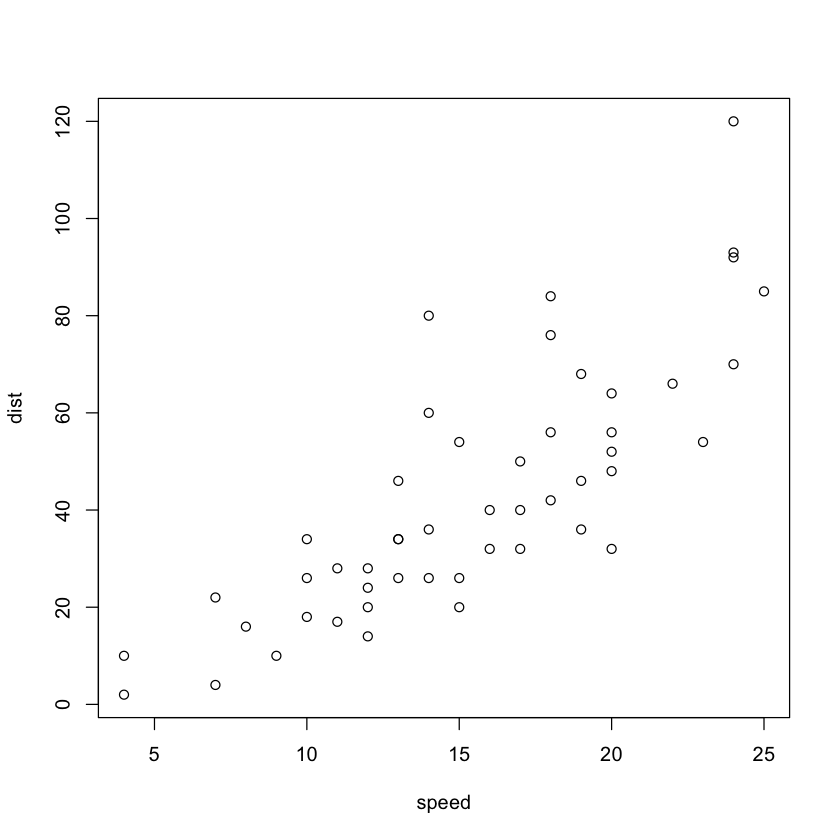

In [18]:
plot(cars)

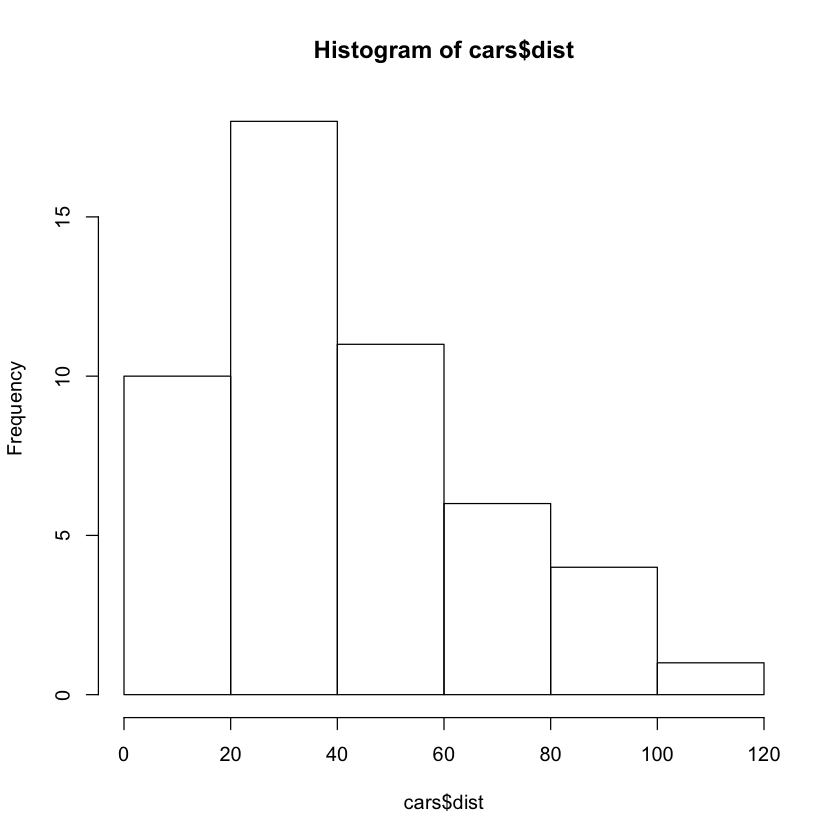

In [19]:
hist(cars$dist)

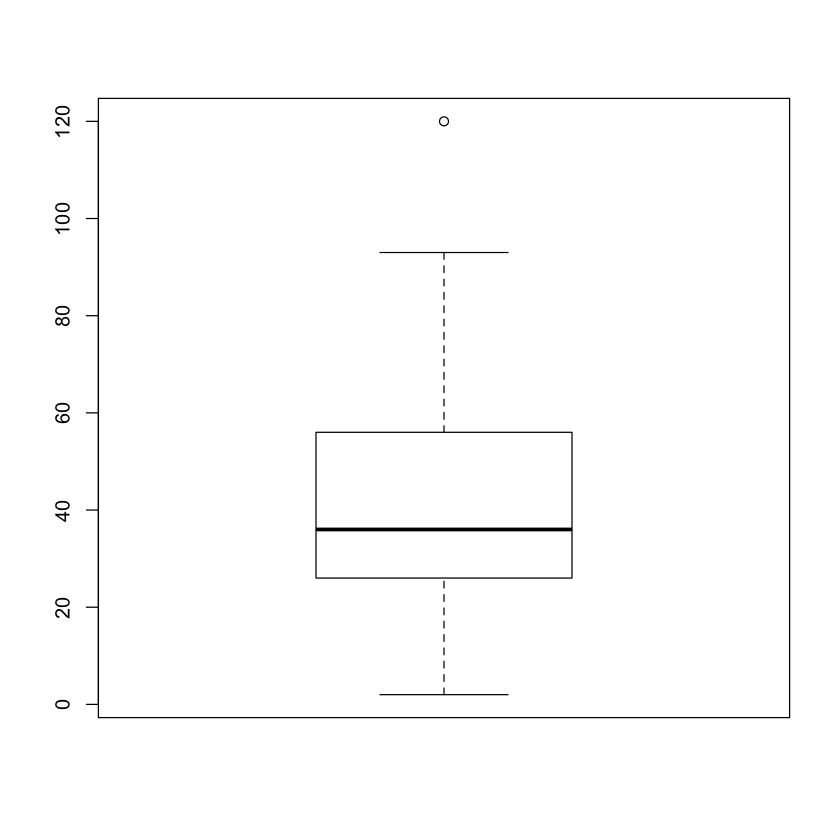

In [20]:
boxplot(cars$dist) # 3, 4분위의 범위크기안에 포함되면 특이치 아니면 이상치로 결정

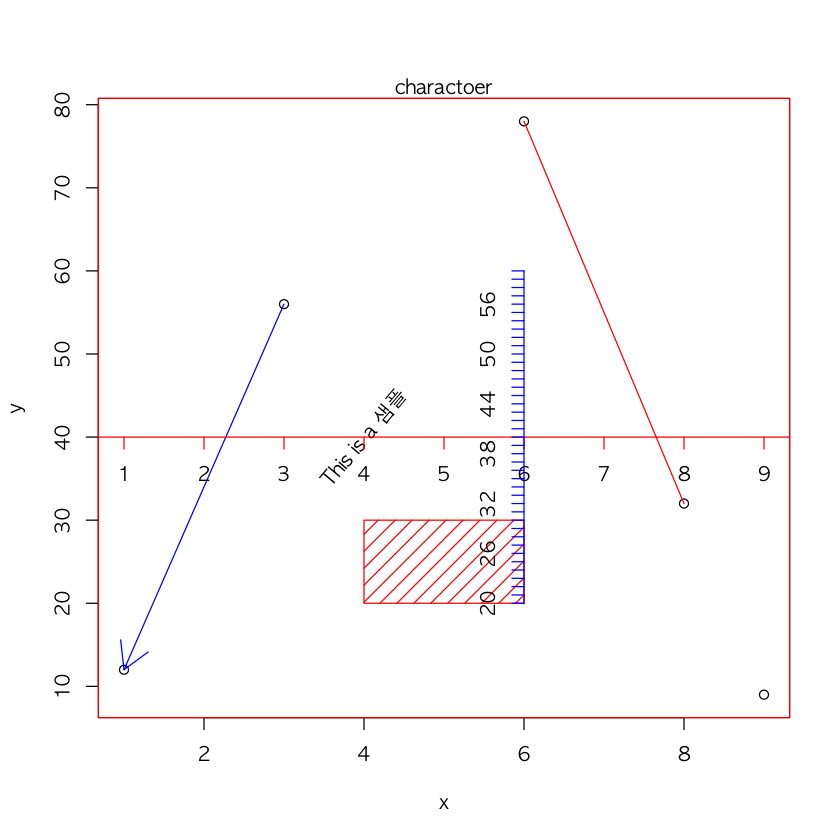

In [21]:
options(warn = -1)
par(family = "AppleGothic")

# 기타 그래프
x <- c( 1,  3,  6,  8, 9)
y <- c(12, 56, 78, 32, 9)

plot(x, y)

# 선분 그리기 (3,3) 와 (4,4)
segments(6, 78, 8, 32, col='red')

# 화살표 그리기
arrows(3, 56, 1, 12, col='blue')

# 사각형 그리기
rect(4,20,6,30, col='red',border='red', density = 10)

# 글자 쓰기
text(4, 40, "This is a 샘플", srt=50)

# 테두리 활용하기
mtext("charactoer", side=3, adj=0.5)

# chartr의 테두리 그리기
box(lty=1, col='red')

# x축의 추가 : y축의 40위치에 0~10까지 표시하고 색은 빨강색
axis(1, pos=40, at=0:10, col='red')

# y축의 추가 : x축의 6위치에 20~60까지 표시하고 색은 파랑색
axis(2, pos=6, at=20:60, col='blue')

In [22]:
# 투표수가 높은 시군구의 후보별 득표수의 막대그래프에 시군구별 투표수 표시하기
library(dplyr)
election <- read.csv("../Data/election_2017.csv")
head(election)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



X,광역시도,시군,pop,moon,hong,ahn
0,서울특별시,종로구,102566,42512,22325,22313
1,서울특별시,중구,82852,34062,17901,19372
2,서울특별시,용산구,148157,58081,35230,32109
3,서울특별시,성동구,203175,86686,40566,45674
4,서울특별시,광진구,240030,105512,46368,52824
5,서울특별시,동대문구,236092,98958,51631,53359


In [26]:
T5 <- t(head(arrange(election, desc(pop)), 5))
colnames(T5) <- paste(T5[2,], T5[3,])
T5 <- T5[-c(1:4),]
rownames(T5) <- c("문재인", "홍준표", "안철수")

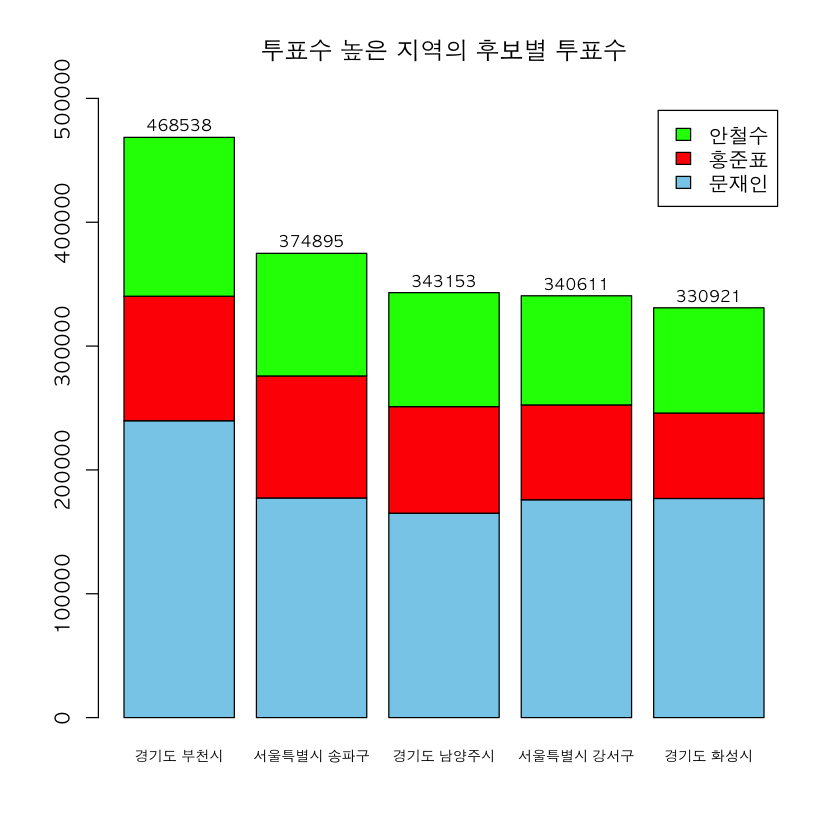

In [34]:
options(scipen = 100)
par(family = "AppleGothic")
barplot(T5,
        cex.names = 0.7,
        col = c("skyblue", "red", "green"),
        ylim = c(0, 500000),
        legend = T,
        main = "투표수 높은 지역의 후보별 투표수"
       )

for(i in 1:5) {    
    d <- (0.7 + 1.2*(i-1))
    val <- sum(as.numeric(T5[,i]))
    text(d, val+10000, val, cex=0.8)
}

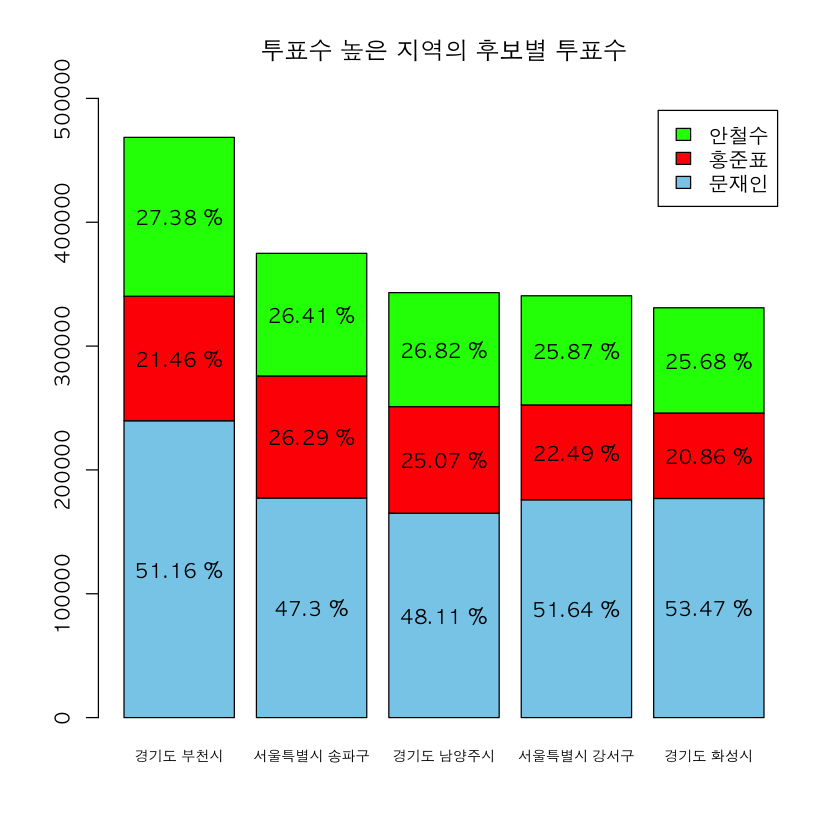

In [96]:
options(scipen = 100)
par(family = "AppleGothic")
barplot(T5,
        cex.names = 0.7,
        col = c("skyblue", "red", "green"),
        ylim = c(0, 500000),
        legend = T,
        main = "투표수 높은 지역의 후보별 투표수"
       )

for(i in 1:5) {    
    d <- (0.7 + 1.2*(i-1))
    elecSum <- sum(as.numeric(T5[,i]))    
    for(j in 1:3) {
        height <- sum(as.numeric(T5[1:j,i])) - as.numeric(T5[j,i]) / 2
        val <- paste(round(as.numeric(T5[j,i]) / elecSum * 100, 2), "%")
        text(d, height, val)
    }
}

# 수학 함수의 시각화
y = x^2

In [113]:
f <- function(x){
    y = x^2
    return(y)
}

In [119]:
x <- 1:3
f(x)

[1] 1 4 9

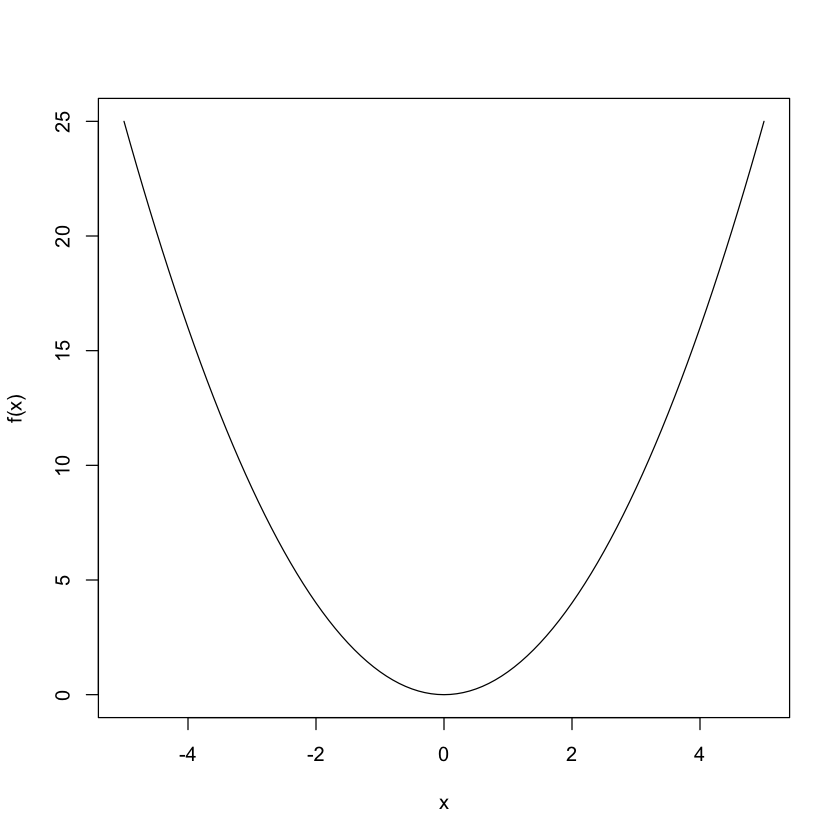

In [121]:
x <- seq(-5,5,0.1)
plot(x, f(x),
    type="l"
    )

y = e^(-x) -4x^2 + x + 3|x| - 3

In [124]:
f <- function(x) {
    y = exp(-x) -4*x^2 + x + 3 * abs(x) - 3
    return(y)
}

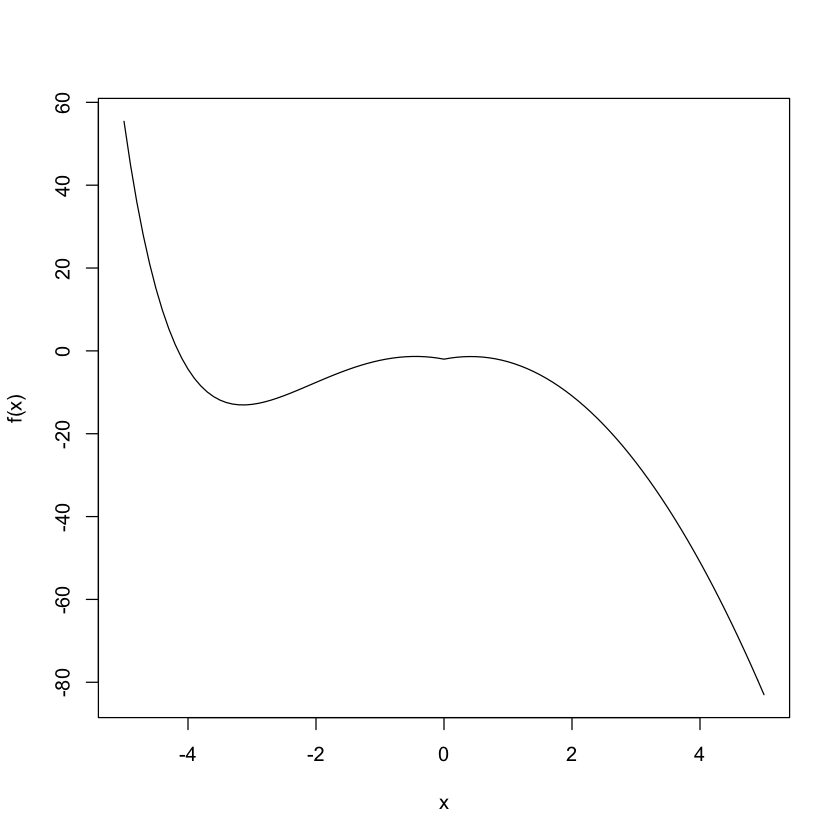

In [125]:
plot(x, f(x),
    type="l")

# y = x^2 + 2x + 3

In [138]:
f <- function(x) {
    y = x^2 + 2* x + 3
    return(y)
}

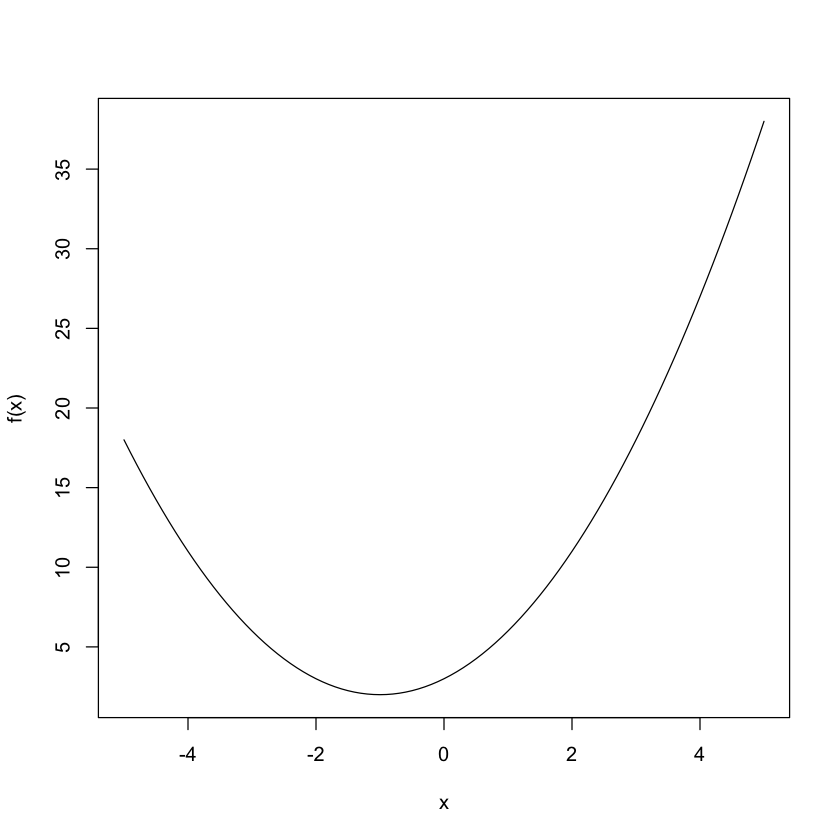

In [141]:
plot(x, f(x),
    type="l")